### 딥-러닝 과정 CNN 

### 두번째 실습. Keras 모델 생성/학습 - MNIST : CNN
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

In [ ]:
from tensorflow.python.client import device_lib
device_lib 

In [13]:
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
#from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import  Image
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [14]:
# 1. 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


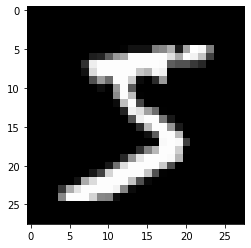

In [15]:
# 2. 이미지 데이터 확인하기 🖼
plt.imshow(x_train[0], cmap=plt.cm.gray)

In [16]:
# 3-1. 이미지 데이터 전처리 : 2차원->3차원 🌟🌟🌟
x_train_3d = x_train.reshape(60000,28,28,-1)
x_test_3d= x_test.reshape(10000,28,28,-1)

In [17]:
x_train_3d[0].shape

(28, 28, 1)

In [18]:
# 3-2. 이미지 데이터 전처리 : Normalzation 
x_train_3d= x_train_3d/255
x_test_3d = x_test_3d/255

In [19]:
# 4. Label 전처리 (one-hot encoding) 

from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train)
print('==='*20)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
# 5. 모델 생성 : CNN 🌟🌟🌟

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D
model = keras.Sequential()
               # filter의 갯수, 필터의 사이즈(홀수로만) #이미지 사이즈 유지? #은닉층"relu" 
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape= (28,28,1)))
model.add(Conv2D(64,(3,3),padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))
model.add(Flatten())
#---------------------------------------------------------------------
model.add(Dense(784, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 784)               9835280   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

In [21]:
# 6. Compile - Optimizer, Loss function 설정
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

/anaconda/envs/py38_tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
x_train_3d.shape

In [ ]:
y_train.shape

In [27]:
# 7. 모델 학습시키기
           
history= model.fit(x_train_3d, y_train,
          batch_size=32,
          epochs=30,
          verbose=1, 
          validation_split= 0.2)  

Epoch 1/30
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0860 - val_accuracy: 0.9889
Epoch 2/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.0806 - val_accuracy: 0.9890
Epoch 3/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0754 - val_accuracy: 0.9898
Epoch 4/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.0982 - val_accuracy: 0.9878
Epoch 5/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0854 - val_accuracy: 0.9902
Epoch 6/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0977 - val_accuracy: 0.9893
Epoch 7/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0902 - val_ac

In [28]:
# 8. 모델 평가하기
train_result = model.evaluate(x_train_3d, y_train)
test_result = model.evaluate(x_test_3d, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0953 - accuracy: 0.9926


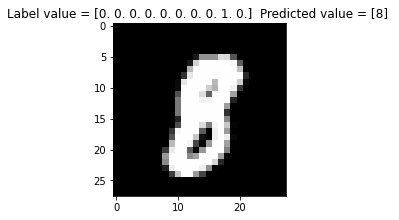

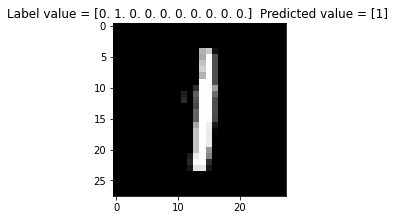

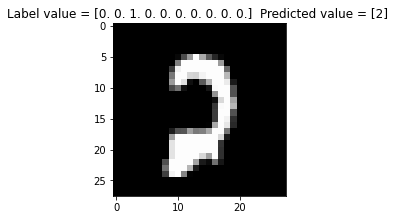

In [29]:
# 9. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼
for index in np.random.choice(len(y_test), 3, replace = False):
    test_image = x_test_3d[index].reshape(1,28,28,1)
    predicted = model.predict(test_image)
    label = y_test[index]
    result_label = np.where(label == np.amax(label))
    result_predicted = np.where(predicted == np.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (label, result_predicted[1])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = x_test_3d
    plt.imshow(images[index].reshape(28, 28), cmap = plt.cm.gray, interpolation = 'nearest')
    plt.show()


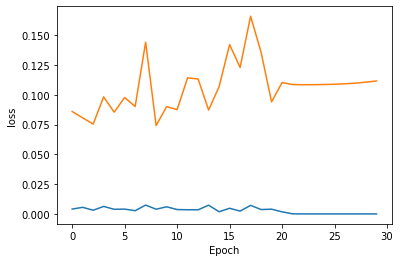

In [30]:
# 10. 학습 시각화하기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
#plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [31]:
model.save('mnlist_gpu.h5')